In [1195]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import rotate
import cv2

In [1196]:
name1="Materiales/AireMu.txt"
name2="Materiales/PMMAMu.txt"
name3="Materiales/SangreMu.txt"
name4="Materiales/YodoPMu.txt"
name5="Materiales/SangreMu1.txt"
name6="Materiales/AortaMu.txt"
MaterialAire = np.genfromtxt(name1)
MaterialPMMA = np.genfromtxt(name2)
MaterialSangre = np.genfromtxt(name3)
MaterialYodoP = np.genfromtxt(name4)
MaterialSangre1 = np.genfromtxt(name5)
MaterialAorta = np.genfromtxt(name6)

Phase retrieval-Beltran

In [1197]:
E=12
nameC="In-line"
nameV="TPMMASM"
nameD="YodoP"+str(E)
nameE="R5"
nameGI="RAWSN"
name3=nameC+"/"+nameV+"/"+nameD
nameSim=nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/"+nameGI+".txt"
a=5.5*(10**(-5))
Npixeles=256
Ek=E*(10**(3))
E_J=Ek*1.6*(10**(-19))
h=6.63*10**(-34)
c=3*(10**(8))
k=(2*np.pi*E_J)/(h*c)
z=1.2
zs=0.6
M=(z+zs)/zs
delta_m1=MaterialPMMA[E-1][1] # PMMA
mu_m1=MaterialPMMA[E-1][0]
#delta_m1=MaterialAorta[E-1][1] # Aorta
#mu_m1=MaterialAorta[E-1][0]
#delta_muestra=MaterialSangre1[E-1][1] # Sangre1
#mu_muestra=MaterialSangre1[E-1][0]
#delta_muestra=MaterialAire[E-1][1] # Aire
#mu_muestra=MaterialAire[E-1][0]
#delta_muestra=MaterialSangre[E-1][1] # Sangre
#mu_muestra=MaterialSangre[E-1][0]
delta_muestra=MaterialYodoP[E-1][1] # YodoP
mu_muestra=MaterialYodoP[E-1][0]
delta_rel=(delta_muestra-delta_m1) 
mu_rel=(mu_muestra-mu_m1)
ss=2
#ss=0
x=np.arange(0,Npixeles,1)
xL=np.arange(0,Npixeles,30)
x_J = np.multiply(xL,np.round((a*(10**(3)))/M,4))
x_mm = np.multiply(x,np.round((a*(10**(3)))/M,4))
labels=x_J.tolist()
X1=7
X2=250

In [1198]:
print("Delta M1:",delta_m1)
print("Mu M1:",mu_m1)
print("Delta M2:",delta_muestra)
print("Mu M2:",mu_muestra)
print("Delta R:",format(delta_rel,".2E"))
print("Mu R:",format(mu_rel,".2E"))

Delta M1: 2.06e-06
Mu M1: 250.0
Delta M2: 1.42e-06
Mu M2: 890.0
Delta R: -6.40E-07
Mu R: 6.40E+02


In [1199]:
def Esp(name, a, delta, mu, z, M, ss):
    frr = np.fft.fftshift(np.fft.fft2(name))  
    Npixeles = len(name)
    u=np.fft.fftshift(np.fft.fftfreq(Npixeles, a))
    v=np.fft.fftshift(np.fft.fftfreq(Npixeles, a))
    uu, vv = np.meshgrid(u, v)
    freq_matrix = (4*(np.pi**2))*(uu**2 + vv**2)
    freq_matrixx=-(2/(a**2))*(np.cos(2*np.pi*a*uu)+np.cos(2*np.pi*a*vv)-2)
    W=(delta*z)/(mu*M) 
    AA=np.ones((Npixeles,Npixeles)) 
    Q=AA+W*freq_matrixx
    QQ=(Q)/(Q**2+ss)
    A=QQ*frr
    img_back = np.fft.ifft2(np.fft.ifftshift(A)).real 
    A1=-(1/mu)*np.log(img_back)
    return A1

In [1200]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

In [1201]:
def func(x,r,PosX):
    k=np.sqrt(r**2 - ((PosX-x))**2)
    return k

In [1202]:
def TubST(X1,X2,Npixeles):
    Thick=np.zeros((Npixeles,Npixeles))
    E=np.concatenate((np.zeros(X1),2*func(x[X1:X2],(X2-X1)/2,(X1+X2)/2),np.zeros(Npixeles-X2)))
    for i in range(Npixeles):
        Thick[i,]=E
    return Thick

In [1203]:
RAWSN=np.genfromtxt(nameSim)
PIRAWSN=PI(RAWSN,0,Npixeles,0,Npixeles)

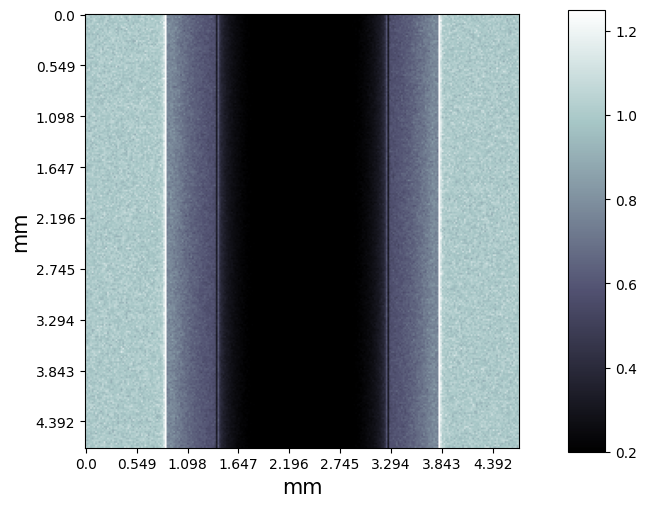

In [1204]:
#X5=81      #R1
#X6=174
#X7=110  
#X8=146
#X5=66      #R3
#X6=189
#X7=95  
#X8=160
X5=46      #R5
X6=209
X7=77  
X8=178
#X5=20      #R6
#X6=235
#X7=52  
#X8=204
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(RAWSN, cmap="bone",vmin=0.2,vmax=1.25)
#ax.vlines(x=X5, ymin=0, ymax=255,linestyle="--", color="red",linewidth=1.9)
#ax.vlines(x=X6, ymin=0, ymax=255,linestyle="--", color="red",linewidth=1.9)
#ax.vlines(x=X7, ymin=0, ymax=255,linestyle="--", color="green",linewidth=1.9)
#ax.vlines(x=X8, ymin=0, ymax=255,linestyle="--", color="green",linewidth=1.9)
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(xL,labels)
plt.yticks(xL,labels)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
plt.savefig(nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/PData/RAWS.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [1205]:
TmS=(TubST(X5,X6,Npixeles)*a)/M
TmK=(TubST(X7,X8,Npixeles)*a)/M
TestSiC=PI(TmS,0,Npixeles,0,Npixeles)
TestSiK=PI(TmK,0,Npixeles,0,Npixeles)
RAWS_M=RAWSN/(np.exp(-mu_m1*TestSiC))
PIMRAWT=PI(RAWS_M,0,Npixeles,0,Npixeles)
LB_LA=np.exp(-mu_muestra*TestSiK-mu_m1*(TestSiC-TestSiK))
Ph_LA=-k*delta_muestra*TestSiK-k*delta_m1*(TestSiC-TestSiK)

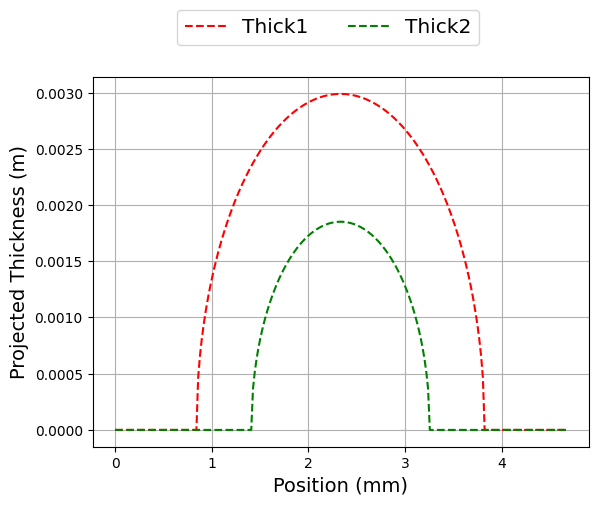

In [1206]:
fig,ax=plt.subplots()
plt.plot(x_mm, TestSiC, '--', label="Thick1", color="red")
plt.plot(x_mm, TestSiK, '--', label="Thick2", color="green")
plt.ylabel("Projected Thickness (m)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.legend(bbox_to_anchor=(0.8, 1.21),mode = "Expand", ncol=2,fontsize=14.5)

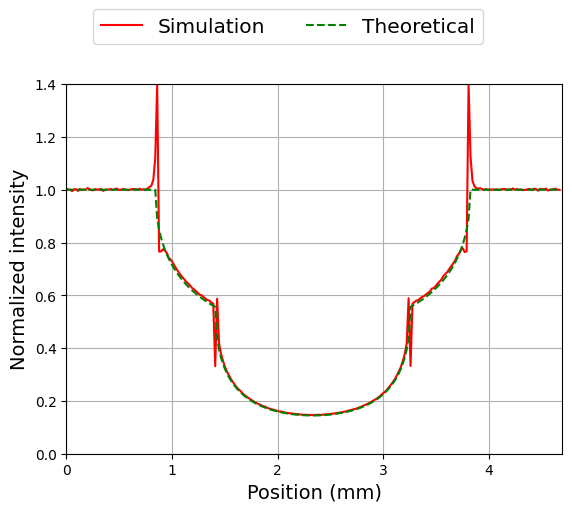

In [1207]:
JJ=0
fig,ax=plt.subplots()
plt.plot(x_mm,PIRAWSN, '-',label="Simulation", color="red")
plt.plot(x_mm,LB_LA+JJ, '--',label="Theoretical", color="green")
plt.ylabel("Normalized intensity",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(0.0,1.4)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.86, 1.23),mode = "Expand", ncol=3,fontsize=14.5)
plt.savefig(nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/PData/RAWPIEx-Si.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

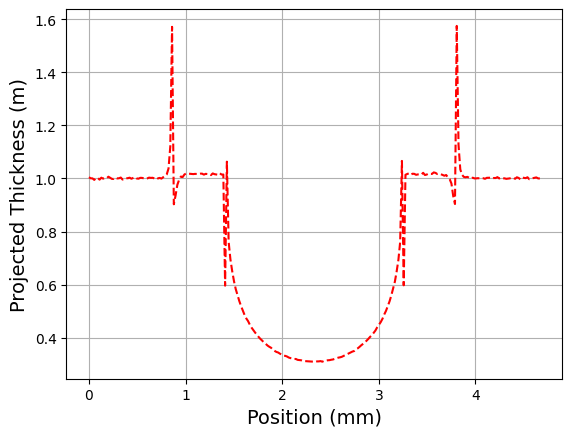

In [1208]:
fig,ax=plt.subplots()
plt.plot(x_mm, PIMRAWT, '--', label="Simulation", color="red")
plt.ylabel("Projected Thickness (m)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()

In [1209]:
M_RAWS=(Esp(RAWS_M, a, delta_rel, mu_rel, z, M, ss))

In [1210]:
PIMRAWS=PI(M_RAWS,0,Npixeles,0,Npixeles)

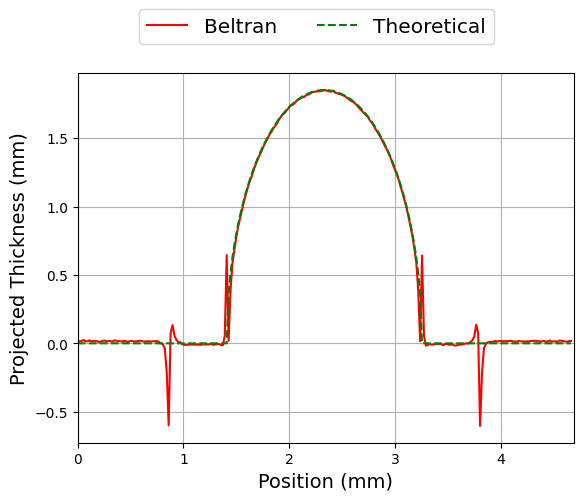

In [1211]:
#JG=0.00 #R1-A1
#JG=0.0010 #R1-A2
#JG=0.000 #R3-A1,A2
#JG=-0.000082 #R5-A1,A2
#JG=-0.00009 #R6-A1, A2
########################
#JG=0.00 #R1-S1
#JG=0.0010 #R1-S2
#JG=-0.00739 #R3-S1
#JG=-0.027 #R3-S2
#JG=-0.00725 #R5-S1
#JG=-0.027 #R5-S2
#JG=-0.0072 #R6-S1
#JG=-0.0268 #R6-S2
########################
#JG=0.00 #R1-Y1
#JG=0.0010 #R1-Y2
#JG=-0.001725 #R3-Y1
#JG=-0.00532 #R3-Y2
JG=-0.0017 #R5-Y1
#JG=-0.0053 #R5-Y2
#JG=-0.0017 #R6-Y1
#JG=-0.00525 #R6-Y2
fig,ax=plt.subplots()
plt.plot(x_mm, (PIMRAWS+JG)*1000, '-', label="Beltran", color="red")
plt.plot(x_mm, TestSiK*1000, '--', label="Theoretical", color="green")
plt.ylabel("Projected Thickness (mm)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.86, 1.2),mode = "Expand", ncol=3,fontsize=14.5)
plt.savefig(nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/PData/ThPIS.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

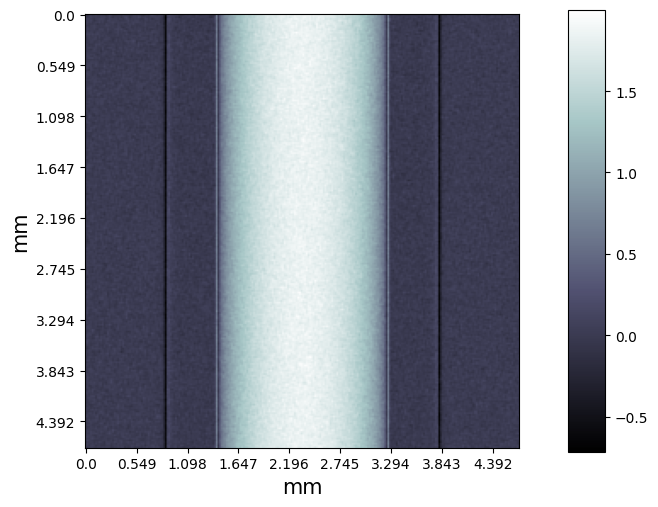

In [1212]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow((M_RAWS+JG)*1000, cmap="bone")
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(xL,labels)
plt.yticks(xL,labels)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
plt.savefig(nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/PData/ThS.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [1213]:
AtenBC=np.exp(-mu_m1*TmS-mu_rel*(M_RAWS+JG))
PhaseBC=-k*delta_m1*TmS-k*delta_rel*(M_RAWS+JG)
PIAt=PI(AtenBC,0,Npixeles,0,Npixeles)
PIPC=PI(PhaseBC,0,Npixeles,0,Npixeles)

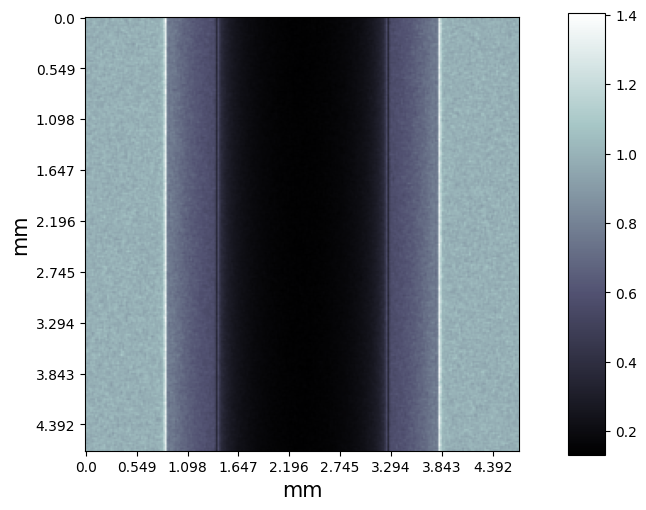

In [1214]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(AtenBC, cmap="bone")
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(xL,labels)
plt.yticks(xL,labels)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)

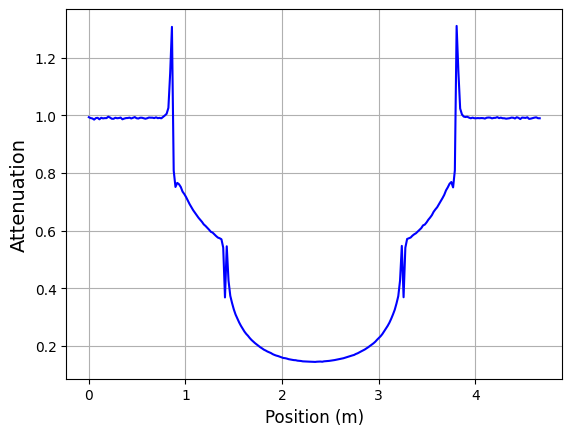

In [1215]:
fig,ax=plt.subplots()
plt.plot(x_mm,PIAt, color="blue",label="Simulation")
plt.ylabel("Attenuation",fontsize=14)
plt.xlabel("Position (m)",fontsize=12)
plt.grid()

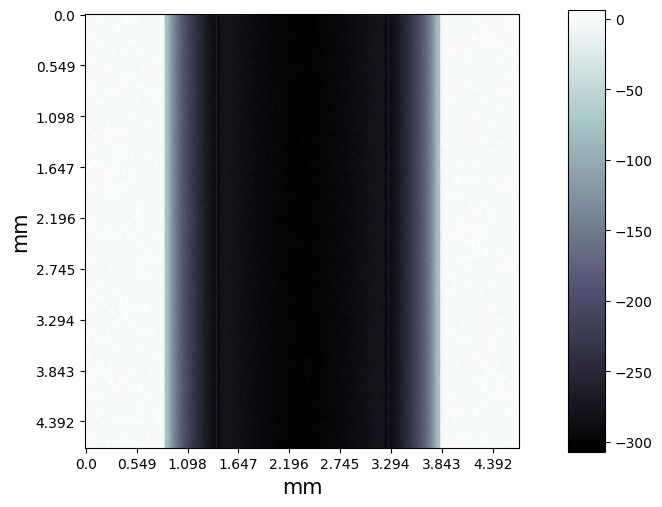

In [1216]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(PhaseBC, cmap="bone")
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(xL,labels)
plt.yticks(xL,labels)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)

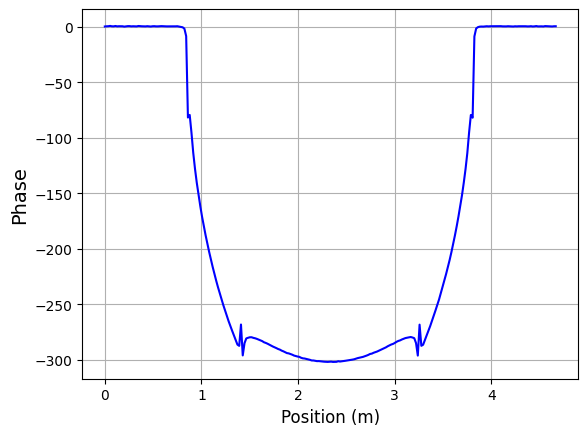

In [1217]:
fig,ax=plt.subplots()
plt.plot(x_mm,PIPC, color="blue",label="Beltran")
plt.ylabel("Phase",fontsize=14)
plt.xlabel("Position (m)",fontsize=12)
plt.grid()

In [1218]:
#np.savetxt(nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/PData/RAWPIS.txt",PIRAWSN)
#np.savetxt(nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/PData/ThS.txt",(M_RAWS+JG)*1000)
#np.savetxt(nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/PData/ThPIS.txt",(PIMRAWS+JG)*1000)